# Decision Trees
### What are Decision Trees?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [9]:
data = df[["BloodPressure", "Age", "Outcome"]]
data


BloodPressure  Age  Outcome
0               72   50        1
1               66   31        0
2               64   32        1
3               66   21        0
4               40   33        1
..             ...  ...      ...
763             76   63        0
764             70   27        0
765             72   30        0
766             60   47        1
767             70   23        0

[768 rows x 3 columns]

In [103]:
X = df[["Glucose", "Pregnancies"]].values
y = df.Outcome.values


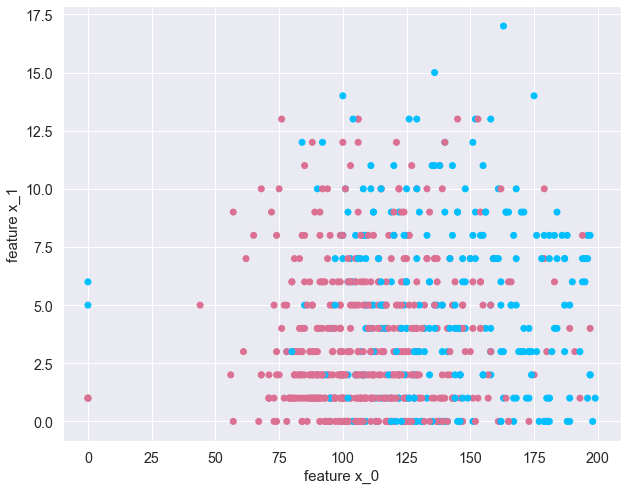

In [104]:

colors = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y]
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y_train]
c_test = ["palevioletred" if Outcome == 0 else "deepskyblue" for Outcome in y_test]

In [106]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

|--- x_0 <= 154.50
|   |--- x_0 <= 99.50
|   |   |--- x_0 <= 22.00
|   |   |   |--- x_1 <= 3.00
|   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  3.00
|   |   |   |   |--- class: 1
|   |   |--- x_0 >  22.00
|   |   |   |--- x_1 <= 11.00
|   |   |   |   |--- x_0 <= 87.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  87.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  11.00
|   |   |   |   |--- x_0 <= 86.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_0 >  86.00
|   |   |   |   |   |--- class: 0
|   |--- x_0 >  99.50
|   |   |--- x_1 <= 5.50
|   |   |   |--- x_0 <= 111.50
|   |   |   |   |--- x_0 <= 101.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  101.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- x_0 >  111.50
|   |   |   |   |--- x_0 <= 127.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  127.50
|   |   |   |   |   |--- class: 0
|   |   |--- x_1 >  5.50
|   |   |   |--- x_0 <= 152.00
|   |   |   |   

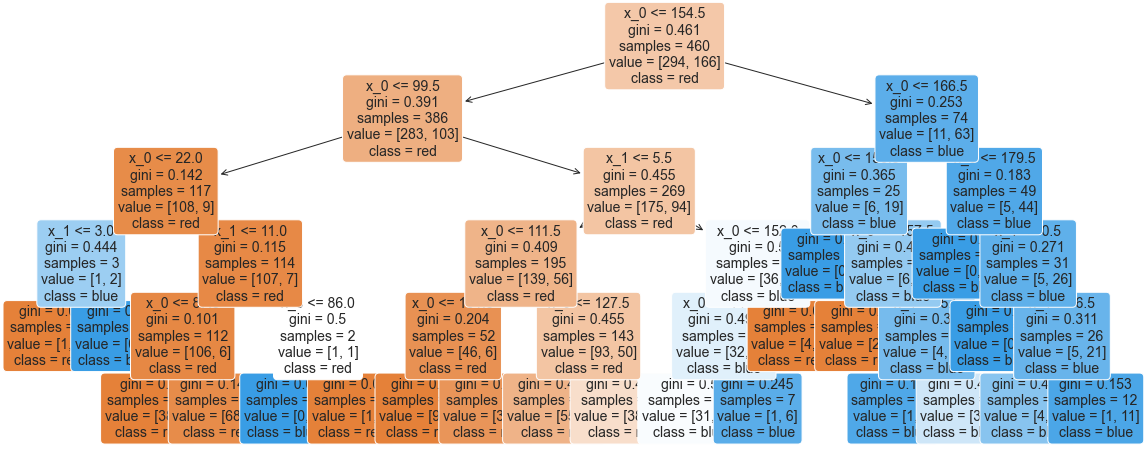

In [107]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

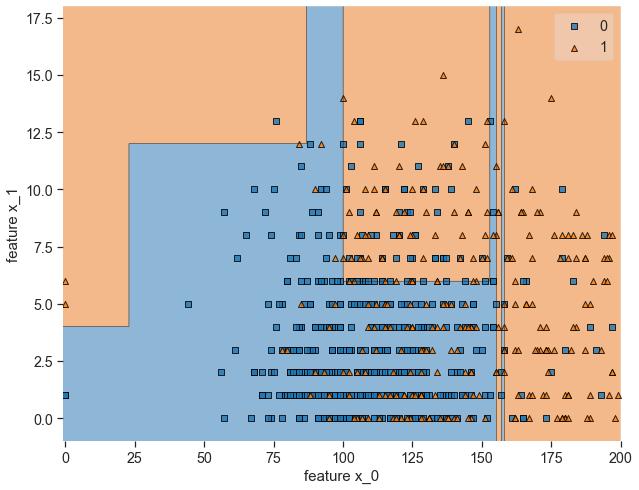

In [108]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

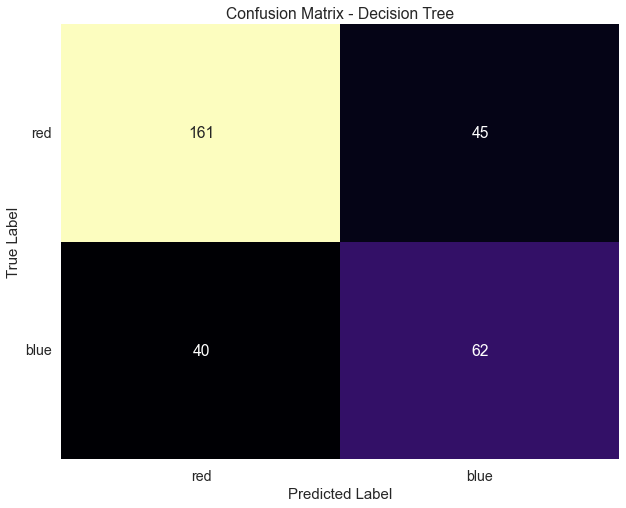

In [109]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [110]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       206
           1       0.58      0.61      0.59       102

    accuracy                           0.72       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.73      0.72      0.73       308



One thing that I would like to shed some light on with Decision trees is that it is very powerful. Even though our test percentage might not show it since it is at a 73% success rate for this particular dataset, if you were to use a different dataset with more spread in its data or less overlap you would see a tremendous improvement in your success rate because of the way decision trees can change directions with the number of max_depth.